In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [4]:
import datetime

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df.set_index('created_at', inplace=True)
df.sort_index(inplace=True)

# to reset index, set_index()

In [ ]:
# at first glance, there are huge purchases (most likely bulk)

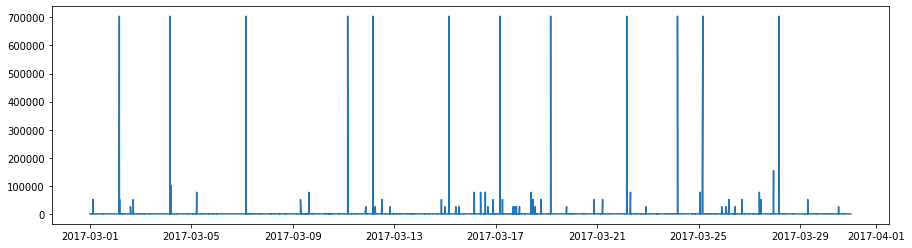

In [14]:
plt.figure(figsize=(15,4))

plt.plot(df.index, df['order_amount'])

In [ ]:
#there are huge purchases (most likely bulk), let's exclude these and see what happens

In [15]:
df[(df['order_amount'] > 1000)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method
created_at,,,,,,
2017-03-01 03:02:10,4312,78,960,51450,2,debit
2017-03-02 04:00:00,4647,42,607,704000,2000,credit_card
2017-03-02 04:00:00,521,42,607,704000,2000,credit_card
2017-03-02 04:13:39,4413,78,756,51450,2,debit
2017-03-02 14:31:12,4041,78,852,25725,1,cash
2017-03-02 17:13:25,2822,78,814,51450,2,cash
2017-03-03 09:09:25,2988,42,819,1056,3,cash
2017-03-04 04:00:00,61,42,607,704000,2000,credit_card
2017-03-04 04:37:34,2493,78,834,102900,4,debit


In [ ]:
# only 71 out of 5000 purchases over $1000 (1.4%). I will excludes these as they are not a good representative of our dataset

In [16]:
df_test = df[(df['order_amount'] < 1000)]

In [17]:
df_test['order_amount'].mean()

301.06431324812337

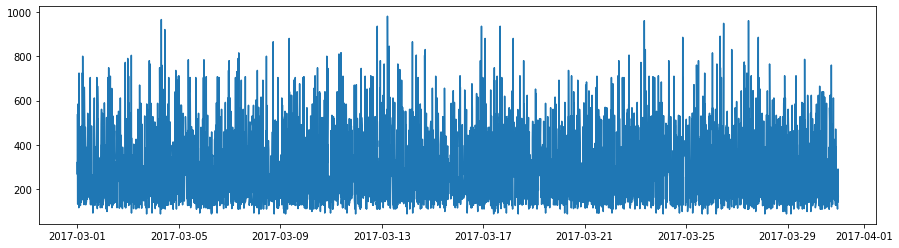

In [18]:
plt.figure(figsize=(15,4))

plt.plot(df_test.index, df_test['order_amount'])

In [ ]:
# this is the data we will continue to analyze. We will come back to the higher order $ when time permits
# further analysis WIP...

# why are there spike every 4 weeks? perhaps weekend... verify this!!

# Question 2

* How many orders were shipped by Speedy Express in total?
* What is the last name of the employee with the most orders?
* What product was ordered the most by customers in Germany?


*** remember to do other analysis!! on top of questions asked :)

Shippers > Orders

* How many orders were shipped by Speedy Express in total?

SELECT *
FROM [Orders]
LEFT JOIN Shippers
ON Orders.ShipperID = Shippers.ShipperID
WHERE ShipperName = 'Speedy Express';


output = 54

* What is the last name of the employee with the most orders?

SELECT *, count(*) FROM [Orders]
LEFT JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Orders.EmployeeID;

output = Peacock

* What product was ordered the most by customers in Germany?

OrderDetails > ProductID & Order ID > Customers in Germany


SELECT *, count(*) 
FROM [OrderDetails] as OD
LEFT JOIN Products as P
ON OD.ProductID = P.ProductID
LEFT JOIN Orders as O
ON OD.OrderID = O.OrderID
LEFT JOIN Customers as C
ON O.CustomerID = C.CustomerID
GROUP BY P.ProductName
HAVING C.Country = 'Germany'
ORDER BY count(*) DESC

output = 	Rössle Sauerkraut & Lakkalikööri

Further analysis

* most popular categories and where are they shipped to/ customer (countries) who are ordering them

In [ ]:
df.set_index('created_at', inplace=True)
df.sort_index(inplace=True)

# to reset index, set_index()

In [ ]:
plt.plot(df.index, df.Close);

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45


In [23]:
df[(df['created_at']>datetime.datetime(2017,3,1)) & (df['created_at']< datetime.datetime(2017,3,31))]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 02:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
# from initial analysis the order amount is the initial amount multiplied by the quantity

In [24]:
df['order_amount'].mean()

3145.128

In [ ]:
## create a function to input dates and find AOV between those dates

In [12]:
test = df.sample(5)

In [13]:
test['order_amount'].mean()

251.2

In [11]:
test.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4981,4982,86,715,260,2,debit,2017-03-10 18:53:38
3870,3871,10,872,444,3,cash,2017-03-28 18:21:05
1231,1232,54,723,133,1,debit,2017-03-28 4:39:06
4241,4242,16,703,468,3,credit_card,2017-03-05 13:21:25
1616,1617,23,971,312,2,debit,2017-03-08 11:46:44
